In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmath
from collections.abc import Sequence

Load data

In [2]:
# Load the data:
data= pd.read_csv('adult.data')
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### H1 Histogram of Education level

In [3]:
# Load the Education donner
df_education = data[['Education',' Education-num']]
df_education

,Education,Education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [4]:
df_education_num = df_education[' Education-num']
df_education_num

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name:  Education-num, Length: 32561, dtype: int64

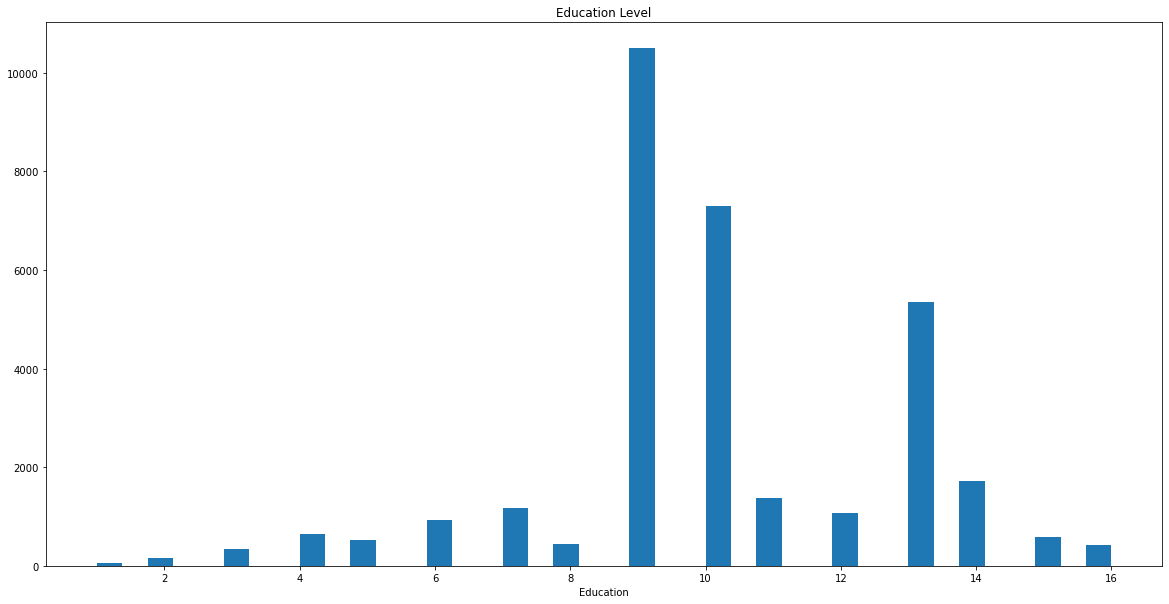

In [5]:
plt.figure(figsize=(20,10))
plt.hist(df_education_num, bins=40)
plt.gca().set(title='Education Level', xlabel='Education');

### H2 Histogram of working hours per week for people with income over 50K

In [6]:
df_hours_per_week = data[['Hours-per-week','Income']] 
df_hours_per_week

,Hours-per-week,Income
0,40,<=50K
1,13,<=50K
2,40,<=50K
3,40,<=50K
4,40,<=50K
...,...,...
32556,38,<=50K
32557,40,>50K
32558,40,<=50K
32559,20,<=50K


In [7]:
df_income_over_50k = pd.DataFrame(df_hours_per_week)
df_income_over_50k = df_income_over_50k[df_income_over_50k['Income'] == ' >50K']
df_income_over_50k

,Hours-per-week,Income
7,45,>50K
8,50,>50K
9,40,>50K
10,80,>50K
11,40,>50K
...,...,...
32539,10,>50K
32545,20,>50K
32554,40,>50K
32557,40,>50K


In [8]:
df_income_over_50k = df_income_over_50k['Hours-per-week']
df_income_over_50k

7        45
8        50
9        40
10       80
11       40
         ..
32539    10
32545    20
32554    40
32557    40
32560    40
Name: Hours-per-week, Length: 7841, dtype: int64

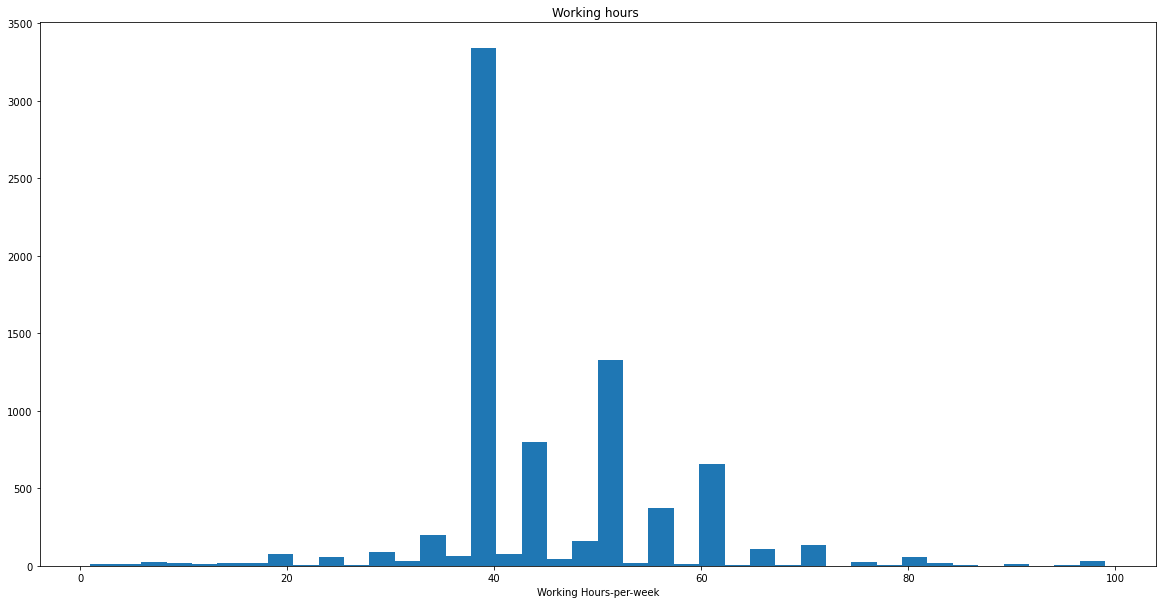

In [9]:
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k, bins=40)
plt.gca().set(title='Working hours ', xlabel='Working Hours-per-week');

### Laplace Mechanism for Histograms

### Q1 
La sensivity est 1 car il s'agit du nombre d'individu dans l'histogramme

### Q2 : Use mechanism Laplace to compute query H1 with {0.01, 0.1, 1}

In [10]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_001.head(10)

0   -316.926659
1   -316.926659
2   -320.926659
3   -322.926659
4   -316.926659
5   -315.926659
6   -324.926659
7   -320.926659
8   -315.926659
9   -316.926659
Name:  Education-num, dtype: float64

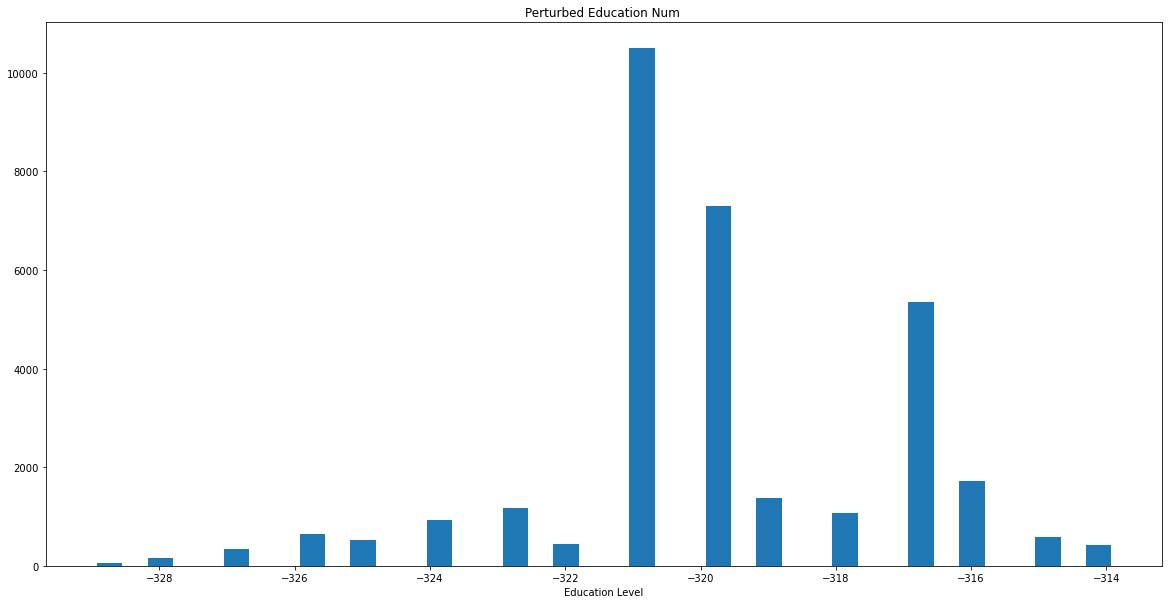

In [11]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [12]:
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_01.head(20)

0     16.207168
1     16.207168
2     12.207168
3     10.207168
4     16.207168
5     17.207168
6      8.207168
7     12.207168
8     17.207168
9     16.207168
10    13.207168
11    16.207168
12    16.207168
13    15.207168
14    14.207168
15     7.207168
16    12.207168
17    12.207168
18    10.207168
19    17.207168
Name:  Education-num, dtype: float64

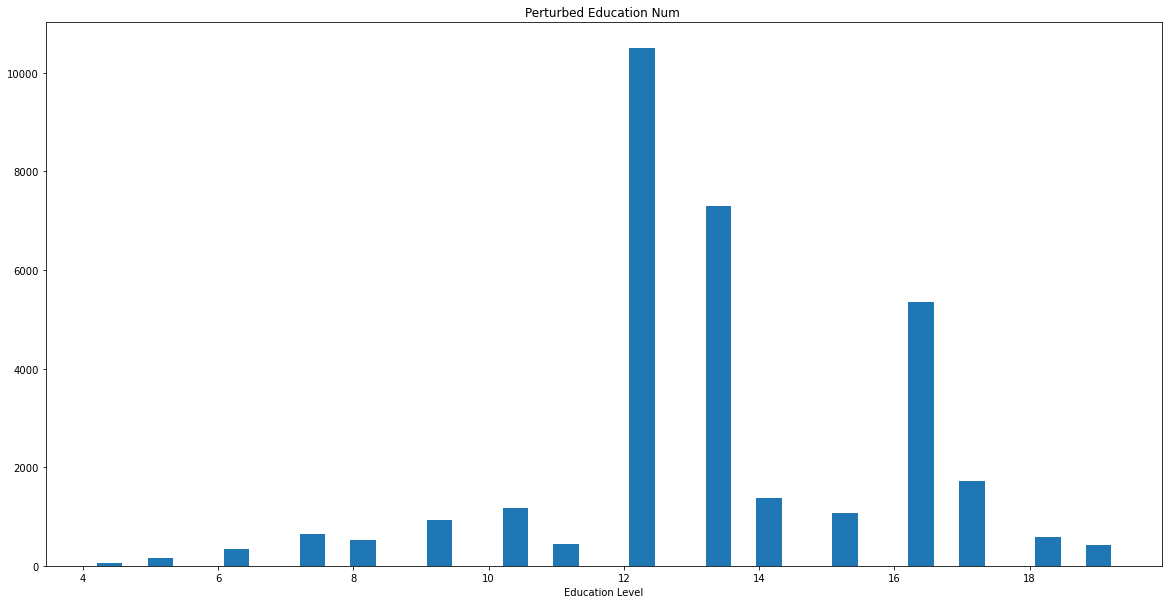

In [13]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [14]:
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_1.head(20)

0     13.078048
1     13.078048
2      9.078048
3      7.078048
4     13.078048
5     14.078048
6      5.078048
7      9.078048
8     14.078048
9     13.078048
10    10.078048
11    13.078048
12    13.078048
13    12.078048
14    11.078048
15     4.078048
16     9.078048
17     9.078048
18     7.078048
19    14.078048
Name:  Education-num, dtype: float64

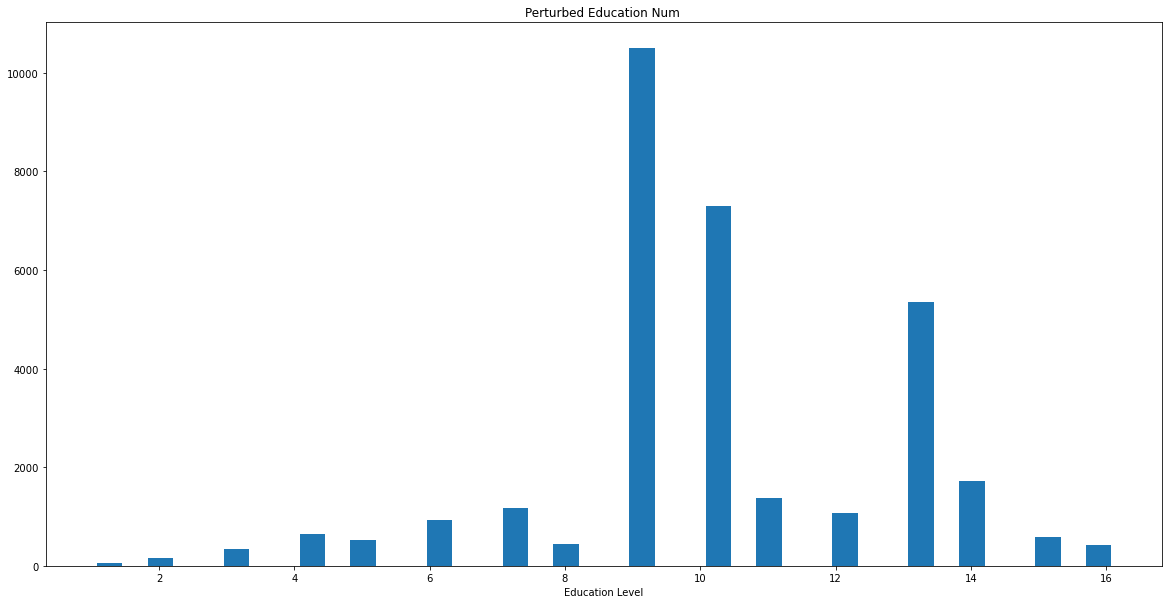

In [15]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

### Q3 1- :  Use mechanism Laplace to compute query H2 with {0.01, 0.1, 1}

In [16]:
## trouvons la sensitivity de la requête H2 : ici il s'agit d'une SUM
sensitivity_h2 = np.amax(df_income_over_50k) 
sensitivity_h2

99

In [17]:
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_001.head(20)

7    -17532.177062
8    -17527.177062
9    -17537.177062
10   -17497.177062
11   -17537.177062
14   -17537.177062
19   -17532.177062
20   -17517.177062
25   -17537.177062
27   -17517.177062
38   -17539.177062
45   -17537.177062
52   -17517.177062
53   -17522.177062
55   -17537.177062
63   -17532.177062
67   -17537.177062
68   -17527.177062
72   -17507.177062
84   -17537.177062
Name: Hours-per-week, dtype: float64

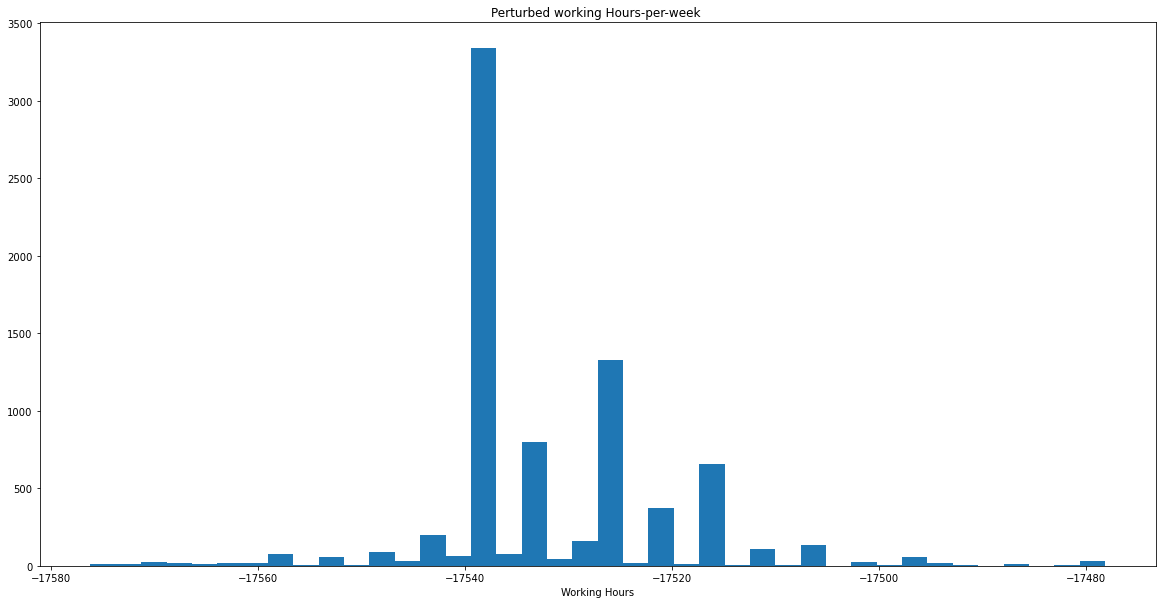

In [18]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed working Hours-per-week ', xlabel='Working Hours');

In [19]:
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_01.head(20)

7     1392.938469
8     1397.938469
9     1387.938469
10    1427.938469
11    1387.938469
14    1387.938469
19    1392.938469
20    1407.938469
25    1387.938469
27    1407.938469
38    1385.938469
45    1387.938469
52    1407.938469
53    1402.938469
55    1387.938469
63    1392.938469
67    1387.938469
68    1397.938469
72    1417.938469
84    1387.938469
Name: Hours-per-week, dtype: float64

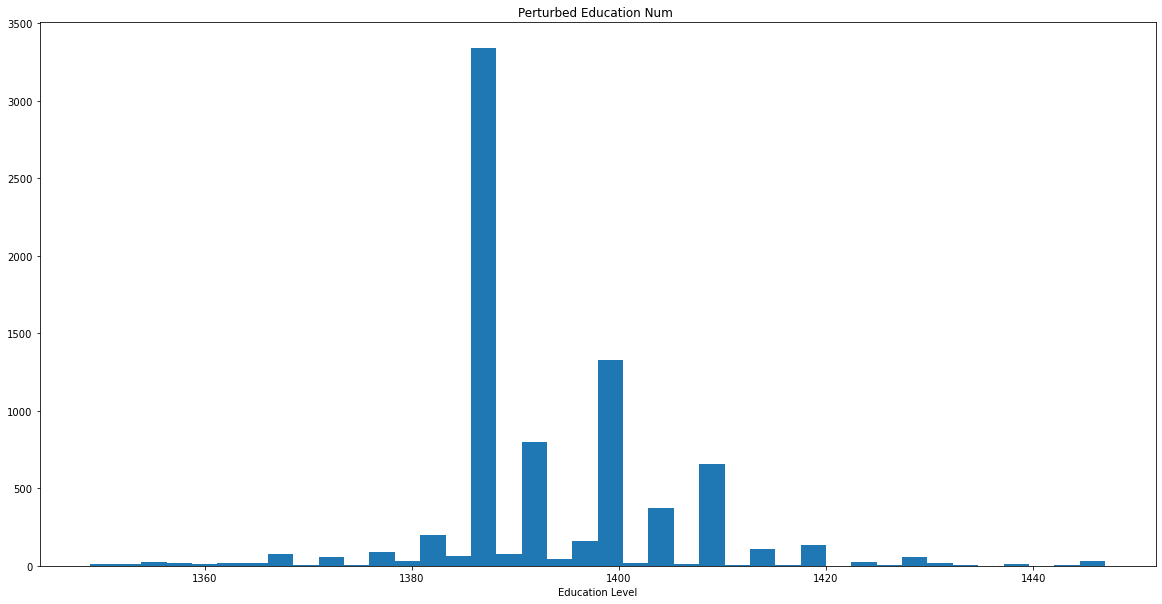

In [20]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [21]:
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_1.head(20)

7     102.012417
8     107.012417
9      97.012417
10    137.012417
11     97.012417
14     97.012417
19    102.012417
20    117.012417
25     97.012417
27    117.012417
38     95.012417
45     97.012417
52    117.012417
53    112.012417
55     97.012417
63    102.012417
67     97.012417
68    107.012417
72    127.012417
84     97.012417
Name: Hours-per-week, dtype: float64

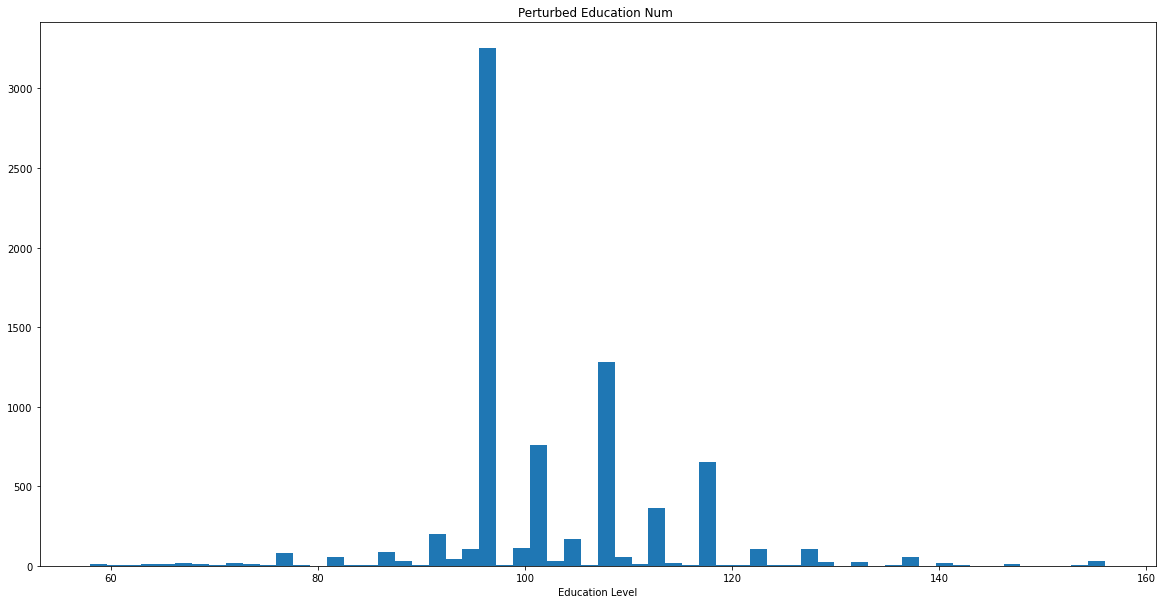

In [22]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=60)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins n'a pas d'effet sur l'histogramme( voir ci-dessus)

# 2. Basic Fourier Perturbation Algorithm

#### Q4.Implemention of the Basic FPA algorithm

In [23]:
#fonction de calcul de la transformée de fourier
def dft(input, kvalues):
    n = len(input)
    output = []
    for k in range(kvalues):  # Pour chaque élément de la sortie
        s = complex(0)
        for t in range(n):  # Pour chaque élément de l'entrée
            angle = 2j * cmath.pi * t * k / n
            s += input[t] * cmath.exp(-angle)
        output.append(s)
    return output

In [24]:
#Permet d'ajouter du bruit aux coefficients de Fourier en utilisant Laplace
def lpa(input, k, scale):
    output = []
    for coef in dft(input, k):
        output.append(coef + np.random.laplace(loc=0, scale=scale))
    
    return output

In [25]:
#implementation de shape car avec le shape fourni par numpy on a pas la même liste à la sortie
def get_shape(lst, shape=()):
    """
    returns the shape of nested lists similarly to numpy's shape.

    :param lst: the nested list
    :param shape: the shape up to the current recursion depth
    :return: the shape including the current depth
            (finally this will be the full depth)
    """

    if not isinstance(lst, Sequence):
        # base case
        return shape

    # peek ahead and assure all lists in the next depth
    # have the same length
    if isinstance(lst[0], Sequence):
        l = len(lst[0])
        if not all(len(item) == l for item in lst):
            msg = 'not all lists have the same length'
            raise ValueError(msg)

    shape += (len(lst), )
    
    # recurse
    shape = get_shape(lst[0], shape)

    return shape

In [26]:
#Transformée de Fourier inverse
def idft(input, kvalues):
    output = []
    N = get_shape(input)[0]
    n = np.arange(N)
    for k in range(kvalues):
        M = np.exp(2j * np.pi * k * n / N)
        output.append(1 / N * np.dot(M, input))
    return output

In [27]:
x = np.random.random(1024)
x

array([0.41462503, 0.72234332, 0.58727472, ..., 0.19396624, 0.33523215,
       0.24330978])

In [28]:
#Test de transformer de Fourier
a = dft(x, 5)
a

[(521.1520835042879+0j),
 (-3.948058797984983+1.2602314138237896j),
 (13.526651426584026+4.971913895633067j),
 (-5.399512133771587-5.181487285567145j),
 (5.677623468706001-6.723418413595159j)]

In [29]:
#Test de la fonction idft
i =idft(a, 5)
i

[(106.20175749356429-1.1345520779410894j),
 (100.31012658195394+0.09025655747537531j),
 (105.44560943557015-3.8605271749906622j),
 (103.4600947444041+5.6025469298726325j),
 (105.7344952487955-0.6977242344162558j)]

In [30]:
#test de la fonction lpa
t = lpa(x, 5, 1 / 0.01)
t

[(301.45920820850944+0j),
 (-441.18896982050467+1.2602314138237896j),
 (17.833906087135258+4.971913895633067j),
 (-96.11701122825303-5.181487285567145j),
 (38.428476737847035-6.723418413595159j)]

In [31]:
#Implémentation de la fonction Basic Fourier Perturbation Algorithm
def bfpa(input, k, scale):
    return idft(lpa(input, k, scale), k)

In [32]:
ff = bfpa(x, 5,  (1 / 0.01))
ff

[(46.04012087446752-1.1345520779410894j),
 (123.30864461477229-6.7696258281598745j),
 (53.78527775822264-29.134681615501407j),
 (51.7997630670566+30.8767013703834j),
 (128.73301328161386+6.162158151218964j)]

In [33]:
coefficient_education = dft(df_education_num.values, 5)
coefficient_education

[(328237+0j),
 (-147.92382495196432-159.41368031904992j),
 (245.16507665454404+276.44336018275504j),
 (161.8970826910219-309.99261153614043j),
 (555.4776401818862+49.47385468131816j)]

#### Q5. Use Basic FPA to compute query H1

In [37]:
sensitivity = 1
epsilon = 0.01

coefficient_education_001 = bfpa(df_education_num, 5,  sensitivity/ epsilon)
coefficient_education_001

[(65687.55140115462-28.69781539822343j),
 (65523.05776174581-71.25822415166888j),
 (65737.2148442868-88.33711855603497j),
 (65465.00893838517+119.7674779491513j),
 (65581.4715874479+68.52568015677598j)]

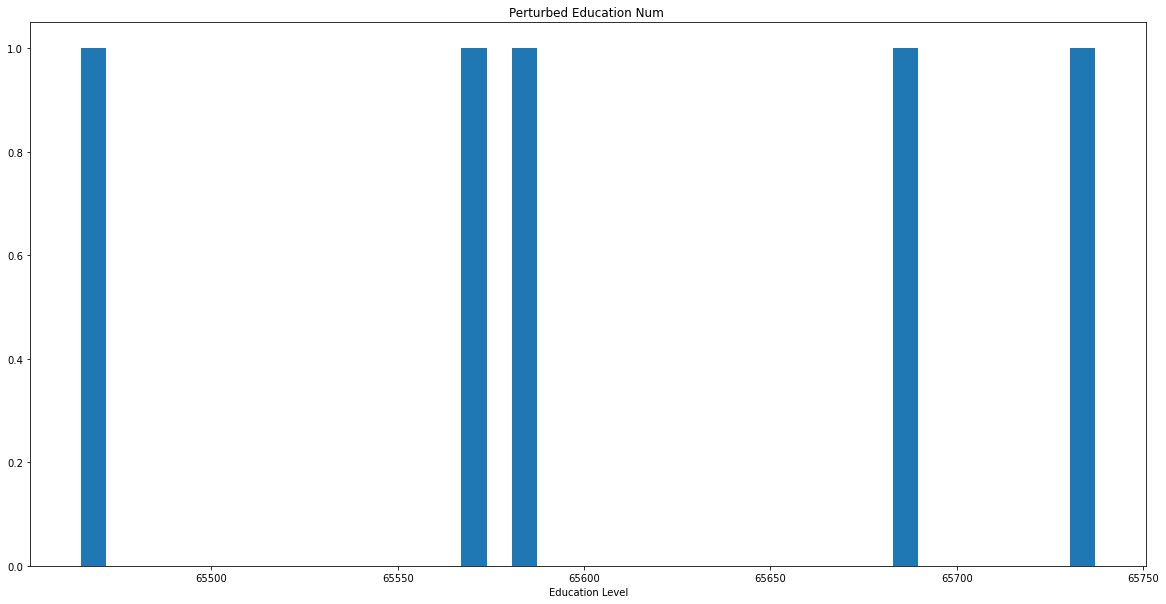

In [38]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(coefficient_education_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [40]:
sensitivity = 1
epsilon = 0.1

coefficient_education_01 = bfpa(df_education_num, 5,  sensitivity/ epsilon)
coefficient_education_01

[(65810.41407164953-28.69781539822343j),
 (65572.7151959157-137.50467980068333j),
 (65749.37552354576-89.6020272543719j),
 (65477.16961764412+121.03238664748831j),
 (65631.1290216178+134.77213580579047j)]

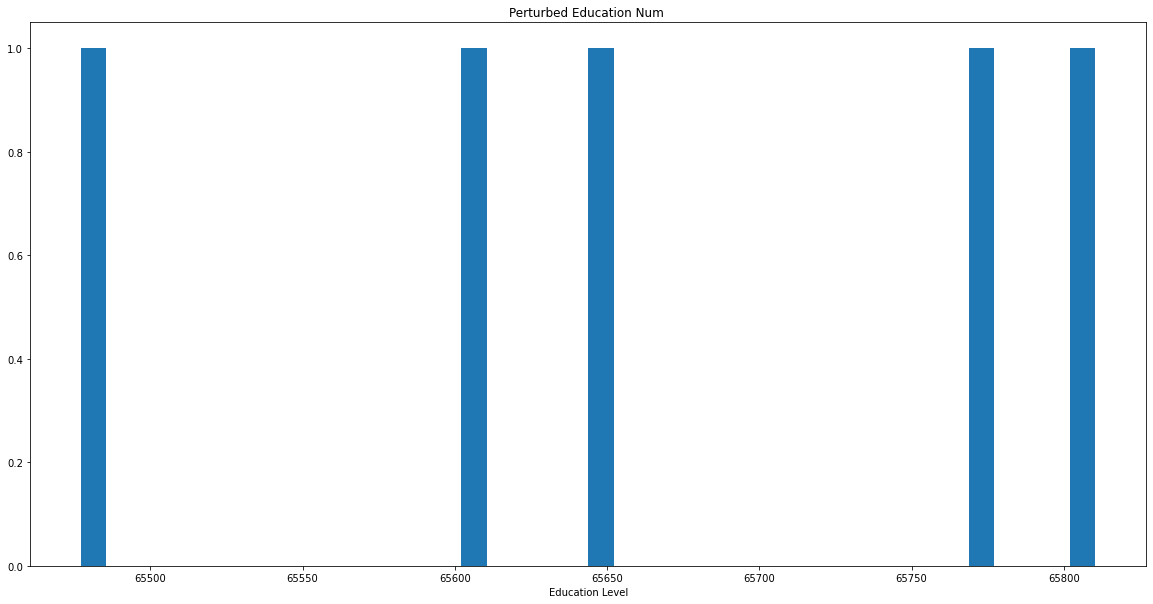

In [41]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(coefficient_education_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');